# Topic Modelling Article Titles with BERTopic

Parts of our notebook: 
* Data Load 
* Preprocessing
* Clustering
* Modelling

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from bertopic import BERTopic

## Data Load

In [29]:
df_titles = pd.read_csv(r"./../../data/raw/JPTIIK_unlabeled.csv")

In [30]:
print(df_titles.head())

                                             article
0  Sistem Pengaman Kendaraan Roda Dua dengan Peng...
1  Implementasi Sistem Pendukung Keputusan untuk ...
2  Pengembangan Database E-Learning PT XYZ menggu...
3  Mekanisme Penyediaan Layanan pada Perangkat Sm...
4  Pengendalian Suhu dan Kelembapan Udara untuk B...


## Preprocessing

In [31]:
vectorizer = TfidfVectorizer(max_features=500)
features_tfidf = vectorizer.fit_transform(df_titles['article'])

In [32]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_tfidf.toarray())

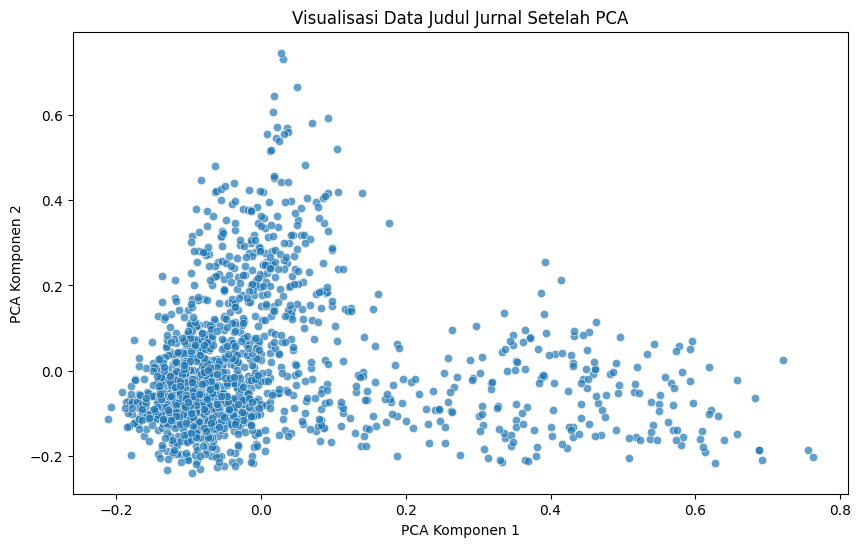

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], alpha=0.7)
plt.title('Visualisasi Data Judul Jurnal Setelah PCA')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.show()

## Clustering

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [35]:
cluster_labels = kmeans.fit_predict(features_pca)

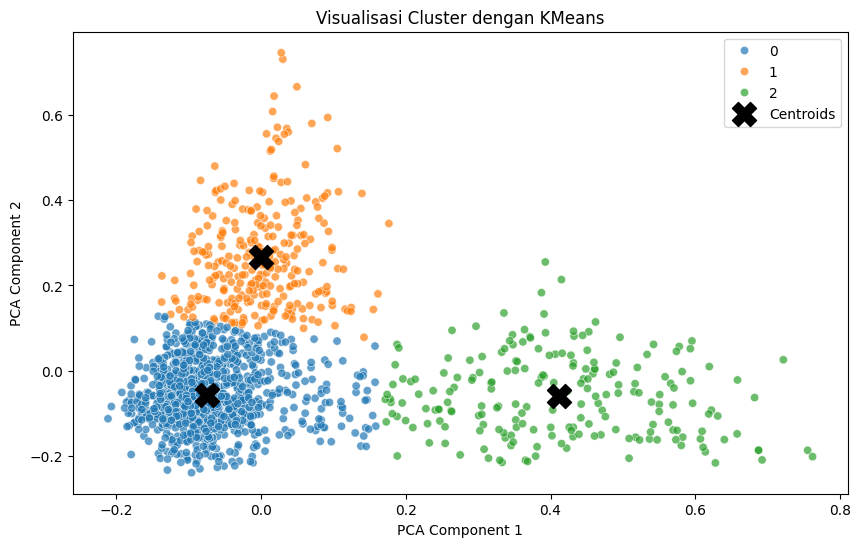

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=cluster_labels, palette="tab10", alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=300, label="Centroids")

plt.title("Visualisasi Cluster dengan KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [37]:
silhouette_avg = silhouette_score(features_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6020725746479604


In [39]:
for i in range(3):
    cluster_data = df_titles[cluster_labels == i]
    cluster_data.to_csv(f"../../data/raw/clustered/cluster_{i}.csv", index=False, encoding='utf-8')
    print(f"Cluster {i} disimpan sebagai cluster_{i}.csv")

Cluster 0 disimpan sebagai cluster_0.csv
Cluster 1 disimpan sebagai cluster_1.csv
Cluster 2 disimpan sebagai cluster_2.csv


## Modelling

In [40]:
cluster_0 = pd.read_csv("../../data/raw/clustered/cluster_0.csv")
cluster_1 = pd.read_csv("../../data/raw/clustered/cluster_1.csv")
cluster_2 = pd.read_csv("../../data/raw/clustered/cluster_2.csv")

clusters = {0: cluster_0, 1: cluster_1, 2: cluster_2}

In [42]:
all_topics = []

for cluster_id, df in clusters.items():
    model = BERTopic(language="indonesian") 
    topics, _ = model.fit_transform(df["article"])
    
    df["topic"] = topics 
    df["cluster"] = cluster_id
    
    all_topics.append(df)


In [ ]:
final_df = pd.concat(all_topics, ignore_index=True)
final_df.to_csv("../../data/cleaned/final_clustered_topics.csv", index=False, encoding="utf-8")